In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data = "severe_cases_daily.csv"
df = pd.read_csv(data)


In [6]:
print(df.shape)
print(df.info())
display(df.head())

(1096, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1096 non-null   object 
 1   ALL        1096 non-null   int64  
 2   Hokkaido   1095 non-null   float64
 3   Aomori     1095 non-null   float64
 4   Iwate      1096 non-null   int64  
 5   Miyagi     1096 non-null   int64  
 6   Akita      1096 non-null   int64  
 7   Yamagata   1096 non-null   int64  
 8   Fukushima  1096 non-null   object 
 9   Ibaraki    1096 non-null   int64  
 10  Tochigi    1096 non-null   int64  
 11  Gunma      1096 non-null   int64  
 12  Saitama    1096 non-null   object 
 13  Chiba      1096 non-null   object 
 14  Tokyo      1096 non-null   int64  
 15  Kanagawa   995 non-null    float64
 16  Niigata    1096 non-null   int64  
 17  Toyama     1096 non-null   int64  
 18  Ishikawa   1096 non-null   int64  
 19  Fukui      1096 non-null   int64  
 2

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/5/9,248,28.0,0.0,0,0,0,0,0,3,...,2,0,0,1,0,2,0,0,0,NaN
1,2020/5/10,222,26.0,0.0,0,0,0,0,0,3,...,0,0,0,1,0,2,0,0,0,NaN
2,2020/5/11,248,24.0,0.0,0,0,0,0,0,2,...,1,0,0,1,0,2,0,0,0,1.0
3,2020/5/12,254,19.0,0.0,0,0,0,2,0,2,...,0,0,11,1,0,2,0,0,0,1.0
4,2020/5/13,241,18.0,0.0,0,0,0,2,2,2,...,0,0,11,0,0,1,0,0,0,1.0


In [9]:
df_all = df[["Date","ALL"]].copy()
print(df_all.head())


        Date  ALL
0   2020/5/9  248
1  2020/5/10  222
2  2020/5/11  248
3  2020/5/12  254
4  2020/5/13  241


In [11]:
df_all["Date"] = pd.to_datetime(df_all["Date"])
print(df_all.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   ALL     1096 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB
None


<BarContainer object of 1096 artists>

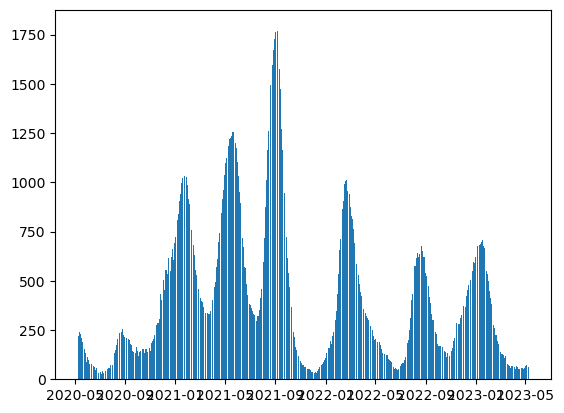

In [13]:
plt.bar(df_all["Date"], df_all["ALL"])


In [14]:
df_all = df_all.set_index("Date")
display(df_all.head())


,ALL
Date,
2020-05-09,248
2020-05-10,222
2020-05-11,248
2020-05-12,254
2020-05-13,241


In [17]:
df_all_rolling7d = df_all.rolling("7D").mean()
display(df_all_rolling7d.head())


,ALL
Date,
2020-05-09,248.000000
2020-05-10,235.000000
2020-05-11,239.333333
2020-05-12,243.000000
2020-05-13,242.600000


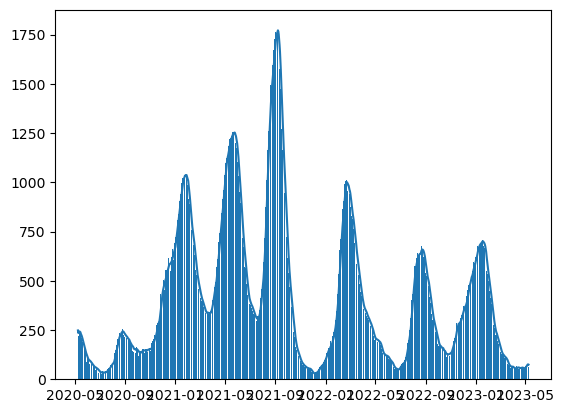

In [18]:
plt.bar(df_all.index, df_all["ALL"],label="ALL")
plt.plot(df_all_rolling7d.index, df_all_rolling7d["ALL"],label="7D Rolling")


In [19]:
df_m_sum = df_all.resample("ME").sum()
display(df_m_sum.head())


,ALL
Date,
2020-05-31,4120
2020-06-30,2052
2020-07-31,1474
2020-08-31,5895
2020-09-30,5269


In [21]:
print(df_m_sum[df_m_sum["ALL"] > 30000])

              ALL
Date             
2021-05-31  36995
2021-08-31  38114
2021-09-30  38920


In [23]:
df_all["day_of_week"] = df_all.index.dayofweek
display(df_all.head(10))


,ALL,day_of_week
Date,,
2020-05-09,248,5
2020-05-10,222,6
2020-05-11,248,0
2020-05-12,254,1
2020-05-13,241,2
2020-05-14,231,3
2020-05-15,230,4
2020-05-16,194,5
2020-05-17,190,6


In [24]:
df_all_2022 = df_all[df_all.index.year == 2022]
display(df_all_2022.head())




,ALL,day_of_week
Date,,
2022-01-01,109,5
2022-01-02,123,6
2022-01-03,134,0
2022-01-04,139,1
2022-01-05,149,2


In [27]:
df_all_week = df_all_2022.groupby("day_of_week").mean()
display(df_all_week)


,ALL
day_of_week,
0,355.038462
1,355.480769
2,355.442308
3,357.519231
4,356.442308
5,349.773585
6,347.230769
